# Visualising the hexagons

In this document, I'll load in the data, and then aim to create different configurations of the hexagons to see what looks good :)

In [1]:
# loading in the SRTM data, and combining the two files into one image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('image', cmap='terrain')


import loadData as LD
import CoordinateTransform as CT
import Hexagon as Hexagon
import HexGrid as HexGrid

seaVal = -20

D1,m1 = LD.load_asc_format('data\\srtm_35_04\\','srtm_35_04.asc',seaVal)
D2,m2 = LD.load_asc_format('data\\srtm_36_04\\','srtm_36_04.asc',seaVal)

D_combined = np.hstack((D1,D2))

del D1,D2

In [7]:
# downsample the data
newD,lcd = LD.downsample_minimum(D_combined)
newM = m1.copy()
newM[2] = newM[2] * lcd
Transform = CT.CoordinateTransform(metadata=newM)

titleText = 'DEFAULT TEXT'

newD created, size is (3000,6000)


## Hexagon configurations:

Need to specify:
+ The centre of the initial hexagon, in real-world coordinates
+ The rotation of the initial hexagon, in degrees
+ The order of faces to be generate new hexagons off of

(i.e. [3,3,3,3] would generate 4  additional hexagons, sequentially to the left of the original one.)

In [58]:
# load in the initial hexagon, and then some configuration

coords = np.array([-1.974412, 43.215345]).reshape((2,1)) # roughly the first point I want
rotation = 3
scale = 550

hexOrder = [3,3,3,3]

titleText = 'Initial idea, 5 hexagons, scale 1100/lcd, rot{}, coords: {}'.format(rotation,coords)

In [28]:
# load in the initial hexagon, and then some configuration

coords = np.array([-2.06, 43.115345]).reshape((2,1)) # roughly the first point I want
rotation = 0
scale = 530

hexOrder = [3,3,3,3]

titleText = 'Newer Idea, Hexagons alligned horizontally  \n 5 hexagons, scale {}, rot{}, coords: {}'.format(scale,rotation,coords)

In [46]:
# load in the initial hexagon, and then some configuration

coords = np.array([-1.9, 43.25]).reshape((2,1)) # roughly the first point I want
rotation = 2
scale = 470

hexOrder = [3,3,3,3,3]

titleText = 'More hexagons, to show off coastline \n 6 hexagons, scale {}, rot{}, coords: {}'.format(scale,rotation,coords)

In [50]:
# load in the initial hexagon, and then some configuration

coords = np.array([-1.86, 43.25]).reshape((2,1)) # roughly the first point I want
rotation = 2
scale = 480

hexOrder = [3,3,3,3,3]

titleText = 'More hexagons, to show off coastline \n 6 hexagons, scale {}, rot{}, coords: {}'.format(scale,rotation,coords)

## Visualisation

In [16]:
# extract the path coordinates from the journeyCoords.txt file, and convert them into image space coordinates.
pathCoords,pathNames = LD.load_coordinate_list('data\\','journeyCoords.txt')

pathImgCoords = Transform.coords2Img(pathCoords)

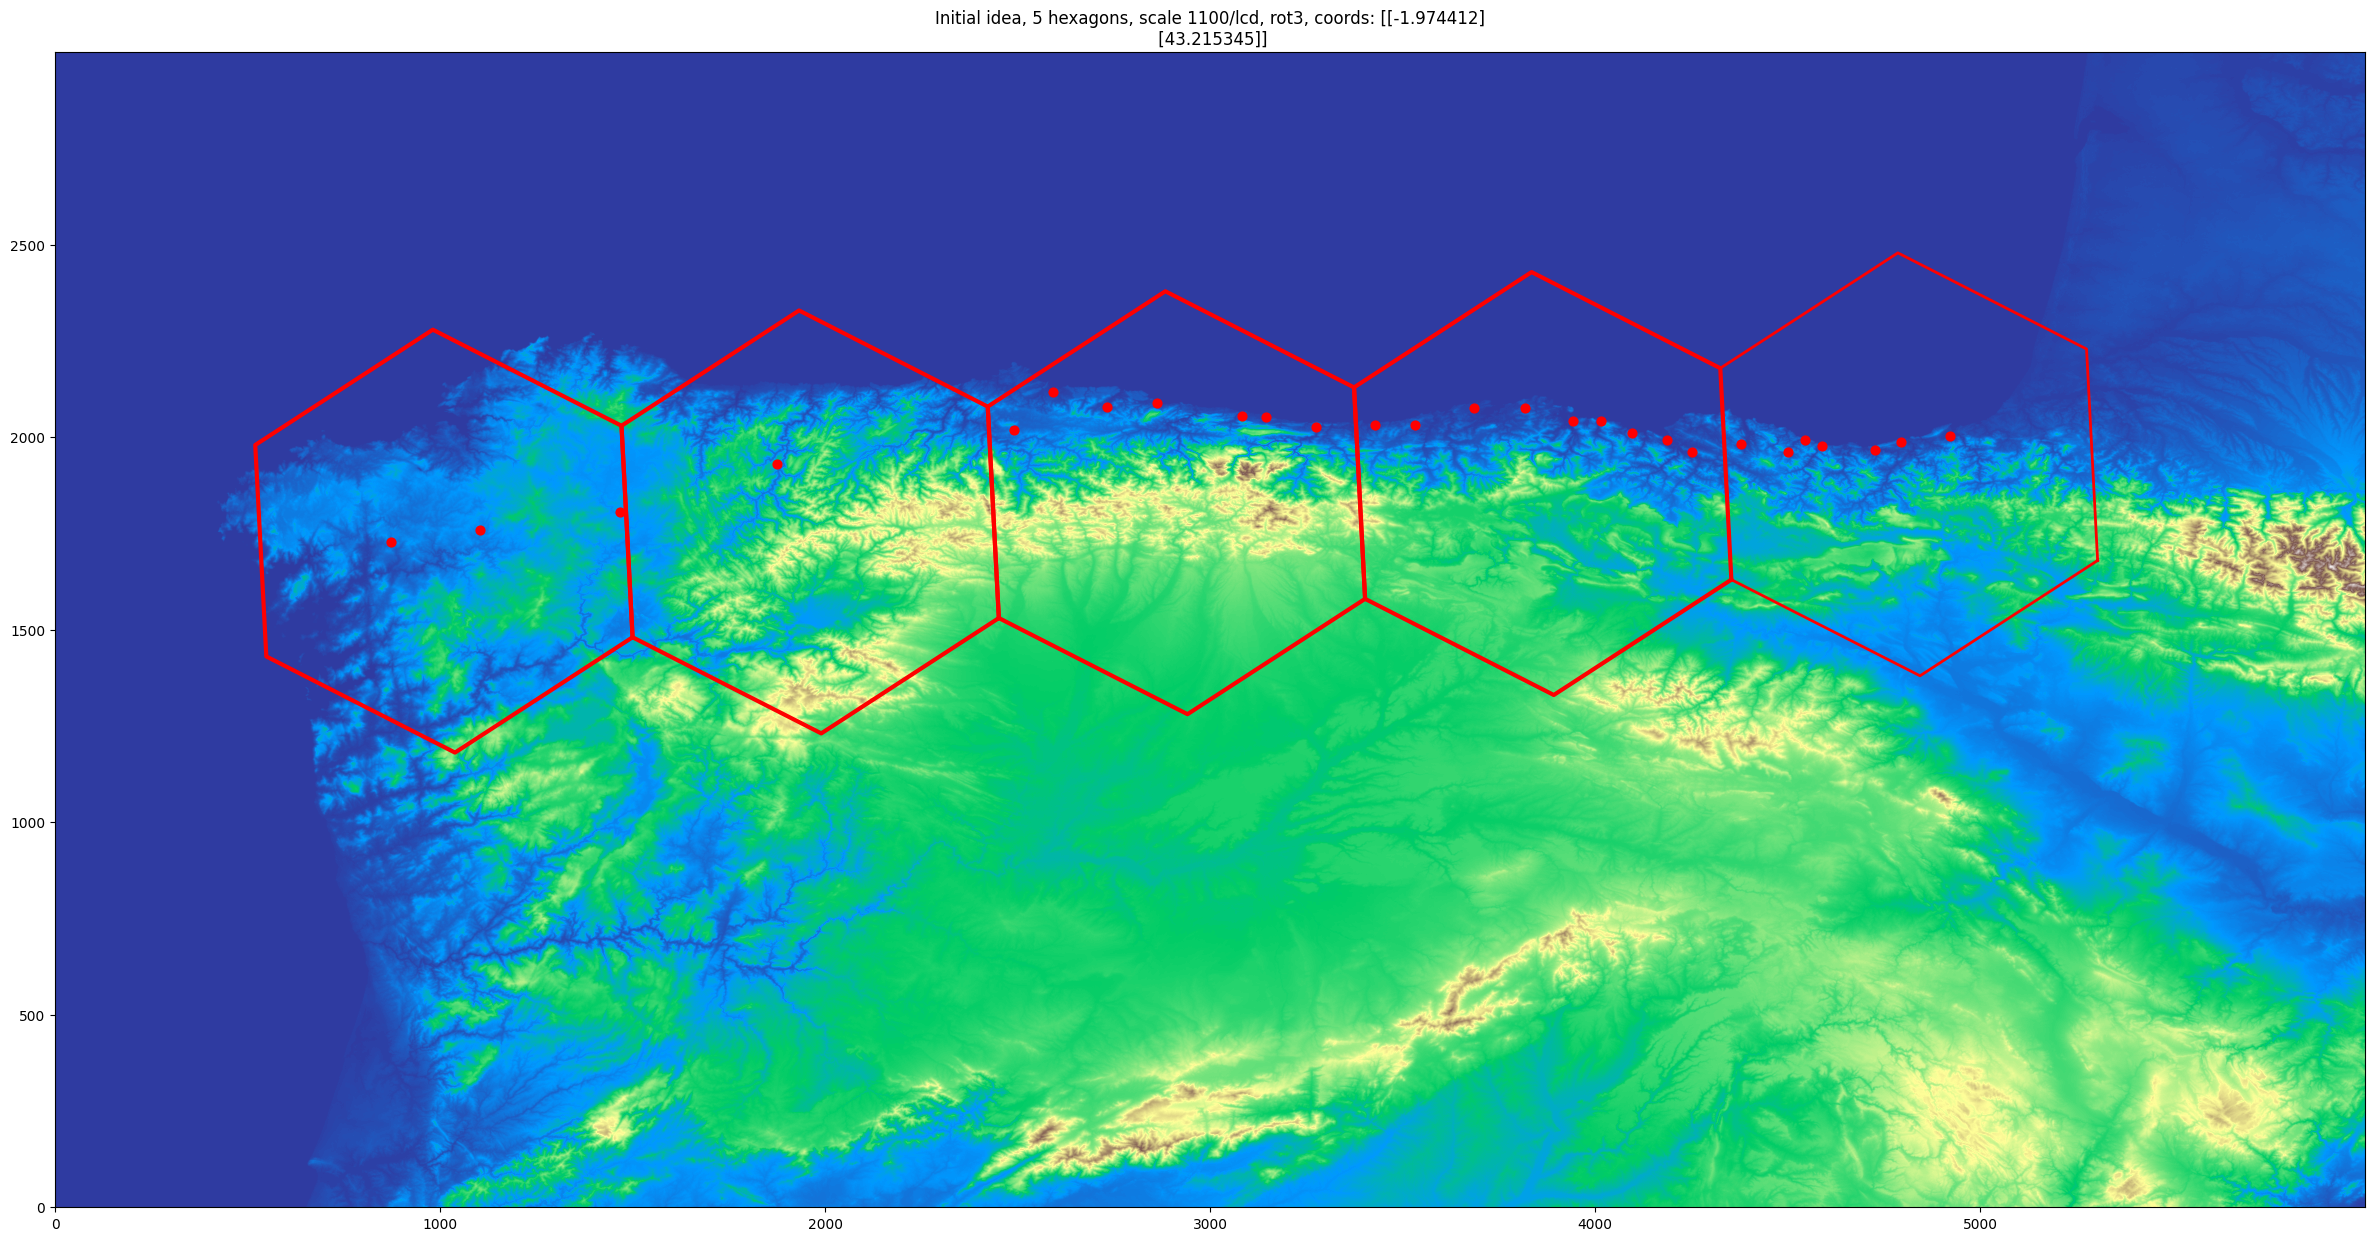

In [59]:
fig,ax = plt.subplots(figsize=(30,15))
plt.hold = True

# plot underlying image and points on journey
ax.imshow(newD,origin='lower',interpolation='bilinear')
ax.scatter(pathImgCoords[0,:],pathImgCoords[1,:],s=40,c='r')

ax.set_title(titleText)

#--------------------------------------------------------------
hexcolour = 'r'

img = Transform.coords2Img(coords)
# create the initial hexagon, plot its vertices on the image
H = Hexagon.Hexagon(scale,rotation,img)

plotVertices = np.hstack((H.vertices, H.vertices[:,0].reshape((2,1))))
ax.plot(plotVertices[0,:],plotVertices[1,:],lw=2,c=hexcolour)

for j in hexOrder:
    H = H.createAdjacentHexagon(j)
    plotVertices = np.hstack((H.vertices, H.vertices[:,0].reshape((2,1))))
    ax.plot(plotVertices[0,:],plotVertices[1,:],lw=3,c=hexcolour)
    
plt.show()